In [1]:
!poetry add pyarrow
!poetry add seaborn

The following packages are already present in the pyproject.toml and will be skipped:

  • pyarrow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  • seaborn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [80]:
users = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/users.parquet")
print(users.info())



<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB
None


In [81]:
orders = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/orders.parquet")
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB
None


In [82]:
regulars = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/regulars.parquet")
print(regulars.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB
None


In [84]:
inventory = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/inventory.parquet")
print(inventory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB
None


In [85]:
abandcarts = pd.read_parquet("/home/pamalo/zrive-ds/data/module_2/abandoned_carts.parquet")
print(abandcarts.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB
None


## Primeras impresiones
- Dentro de usuarios tenemos variables con missing values(count_people, count_adults, count_children, count_babies, count_pets). Podrían ser valores opcionales a rellanar que el usuario omite completar.
- ¿Que tipo de usuarios tenemos?


In [86]:
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [87]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923
std,1.365753,0.869577,1.026246,0.289086,0.995603
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000


- El 75% de los usuarios no tiene bebes y tiene 1 mascota

In [88]:
# Calcular n_orders agrupados por user_id
n_orders_per_user = orders.groupby('user_id')['id'].count().reset_index().rename(columns={'id': 'n_orders'})
# Fusionar los datos
users = users.merge(n_orders_per_user, on='user_id', how='left').fillna({'n_orders': 0})
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_orders
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,10
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1


In [89]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,n_orders
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,1.760586
std,1.365753,0.869577,1.026246,0.289086,0.995603,1.936537
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,2.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,25.000000


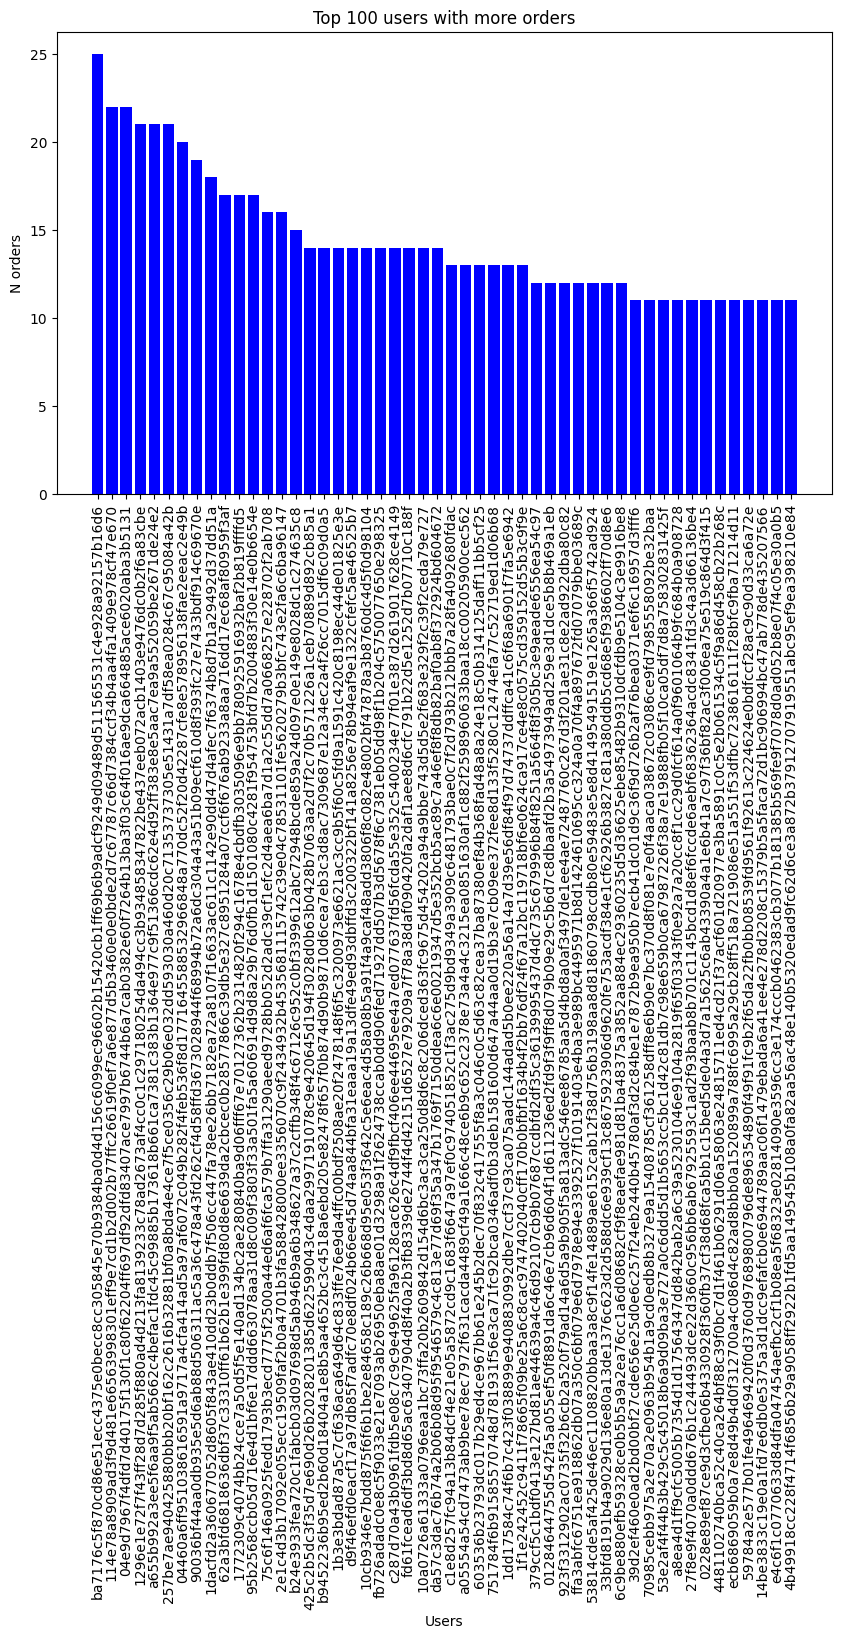

In [90]:
# contar orders por users
orders_by_user = orders['user_id'].value_counts()

#users con mas orders
top_10_users = orders_by_user.head(50)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_users.index, top_10_users.values, color='blue')
plt.xlabel('Users')
plt.ylabel('N orders')
plt.title('Top 100 users with more orders')
plt.xticks(rotation=90)  # Para rotar las etiquetas del eje x
plt.show()

- Máximo número de pedidos por usuario es de 25 y la media de 1,7

In [91]:
# Calcular n_regulars agrupados por user_id"
n_regulars = regulars.groupby('user_id')['variant_id'].nunique().reset_index().rename(columns={'variant_id': 'n_regulars'})
# Fusionar los datos
users = users.merge(n_regulars, on='user_id', how='left').fillna({'n_regulars': 0})
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_orders,n_regulars
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,0.0
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,0.0
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,0.0
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,10,0.0
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,0.0


In [92]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,n_orders,n_regulars
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,1.760586,2.481437
std,1.365753,0.869577,1.026246,0.289086,0.995603,1.936537,8.890588
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,25.000000,320.000000


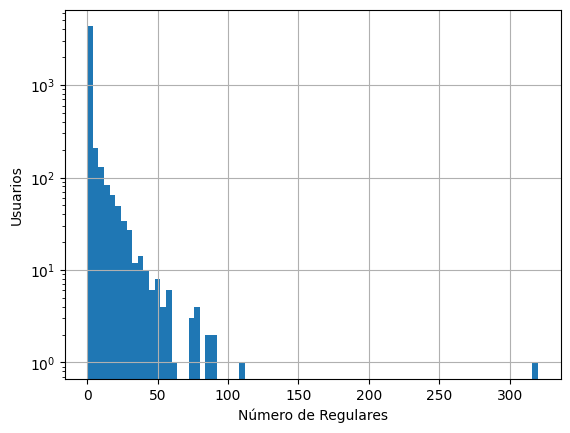

In [93]:
users['n_regulars'].hist(bins=80, log= True)
plt.xlabel('Número de Regulares')
plt.ylabel('Usuarios')
plt.show()

- El 75% tiene 1 regular
- Hay una persona que tiene 300 regulares

Text(0.5, 1.0, 'Average number of regulars per user segment')

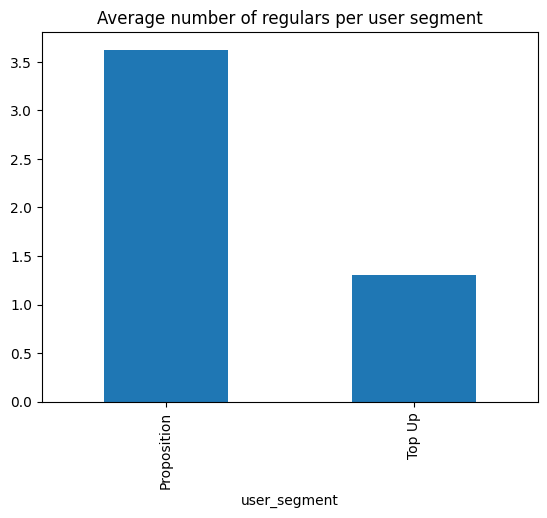

In [94]:
users.loc[lambda x: x.n_regulars< 100].groupby('user_segment')['n_regulars'].mean().plot(kind='bar')
plt.title('Average number of regulars per user segment')

- Proposition tiene mas regulares que Top Up

In [95]:
# contar los valores de las columnas count_people sin null values
family_inputs = users.count_people.dropna().count()
# coger las tres columnas de users y sumar cada valor por fila. Segunda suma para contar el numero de valores true.
Users_with_pet_children_or_baby = (users[['count_pets', 'count_children', 'count_babies']].sum(axis=1)>0).sum()/family_inputs
print("The percent of users with pets, children or babies is: ", Users_with_pet_children_or_baby*100)

The percent of users with pets, children or babies is:  61.23076923076923


- The percent of users with pets, children or babies is:  61.23%

In [96]:
cohort_distribution = users['customer_cohort_month'].value_counts().sort_index()
print(cohort_distribution)

customer_cohort_month
2020-04-01 00:00:00      3
2020-05-01 00:00:00     22
2020-06-01 00:00:00     35
2020-07-01 00:00:00     42
2020-08-01 00:00:00     38
2020-09-01 00:00:00     68
2020-10-01 00:00:00     88
2020-11-01 00:00:00     98
2020-12-01 00:00:00    109
2021-01-01 00:00:00    272
2021-02-01 00:00:00    220
2021-03-01 00:00:00    205
2021-04-01 00:00:00    205
2021-05-01 00:00:00    167
2021-06-01 00:00:00    185
2021-07-01 00:00:00    130
2021-08-01 00:00:00    124
2021-09-01 00:00:00    108
2021-10-01 00:00:00    507
2021-11-01 00:00:00    639
2021-12-01 00:00:00    454
2022-01-01 00:00:00    688
2022-02-01 00:00:00    429
2022-03-01 00:00:00    147
Name: count, dtype: int64


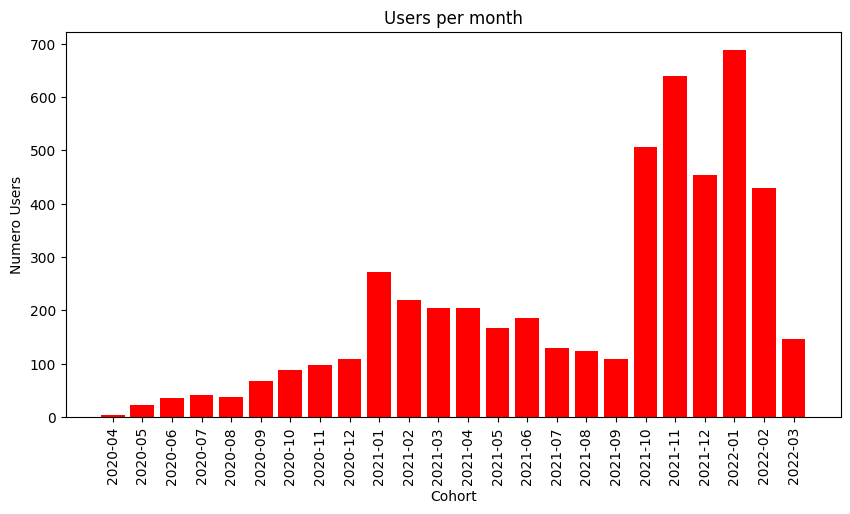

In [97]:
cohort_months = [
    '2020-04', '2020-05', '2020-06', '2020-07',
    '2020-08', '2020-09', '2020-10', '2020-11',
    '2020-12', '2021-01', '2021-02', '2021-03',
    '2021-04', '2021-05', '2021-06', '2021-07',
    '2021-08', '2021-09', '2021-10', '2021-11',
    '2021-12', '2022-01', '2022-02', '2022-03'
]

user_counts = [
    3, 22, 35, 42, 38, 68, 88, 98,
    109, 272, 220, 205, 205, 167, 185,
    130, 124, 108, 507, 639, 454, 688, 429, 147
]

plt.figure(figsize=(10, 5))
plt.bar(cohort_months, user_counts, color='red')
plt.xlabel('Cohort')
plt.ylabel('Numero Users')
plt.title('Users per month')
plt.xticks(rotation= 90)

plt.show()

- Se crean mas users nuevos en enero de cada año 

## USER INSIGHTS
- El 75% de los usuarios no tiene bebes y tiene 1 mascota
- Máximo número de pedidos por usuario es de 25 y la media de 1,7
- El 75% tiene 1 regular
- Hay una persona que tiene 300 regulares
- Proposition tiene mas regulares que Top Up
- The percent of users with pets, children or babies is:  61.2%
- Se crean mas users nuevos en enero de cada año 


## Understanding Regulars

In [98]:
regulars_df = regulars.merge(inventory, on ='variant_id', how = 'left')
regulars_df.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.5,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"


In [99]:
regulars_df.isna().sum()  

user_id                0
variant_id             0
created_at             0
price               3071
compare_at_price    3071
vendor              3071
product_type        3071
tags                3071
dtype: int64

<Axes: xlabel='variant_id', ylabel='N users'>

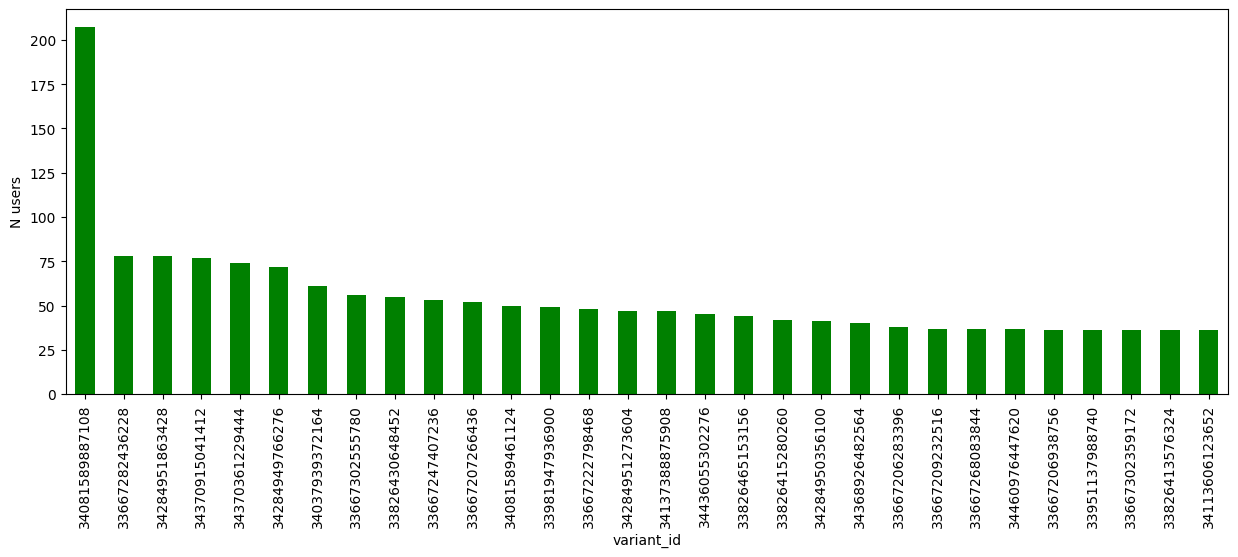

In [100]:
clean_regulars = regulars_df.dropna()
plt.ylabel('N users')
clean_regulars.groupby(['variant_id'])['user_id'].nunique().sort_values(ascending=False).head(30).plot(kind='bar', figsize =(15,5), color ='green')

- Hay in producto que lo compra mucha gente 

In [101]:
variant_id_especial = 34081589887108

producto_info = regulars_df[regulars_df['variant_id'] == variant_id_especial]
producto_info.head(1)


,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
95,1e49bd8004043d757673793e7d5ea394b4eca7f852b179...,34081589887108,2021-01-13 06:12:03,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"


- El producto especial es un oatly (leche) y vale 10.79

In [102]:
# Productos más caros agrupados por product_type
expensive_regular_products = regulars_df.groupby('product_type')['price'].max().sort_values(ascending=False).head(10)
print(expensive_regular_products)

product_type
baby-kids-toiletries      59.99
superfoods-supplements    49.99
bath-shower-gel           47.99
haircare                  47.99
mixed-bundles             42.99
wine                      40.49
dog-food                  39.99
cooking-ingredients       35.99
washing-powder            33.99
nappies-nappy-pants       31.99
Name: price, dtype: float64


In [103]:
clean_regulars.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.50,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"
8,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667182493828,2020-05-06 14:42:11,4.29,5.40,bulldog,skincare,"[cruelty-free, eco, facial-skincare, vegan]"
17,d883991facbc3b07b62da342d00c97d1e6cea8d2176695...,33667198910596,2020-07-06 10:12:08,14.99,16.55,ecover,dishwashing,"[cruelty-free, dishwasher-tablets, eco, vegan]"
18,66a195720d6988ff4d32155cc03631b84f68b34d3b0a1e...,33826459320452,2020-07-06 17:17:52,5.09,5.65,treeoflife,snacks-confectionery,"[christmas, nuts-dried-fruit-seeds, organic]"
19,0b7e02fee4b9e215da3bdae70050f20c5ffd18264454a5...,33667247276164,2020-07-18 16:56:55,2.49,3.00,method,hand-soap-sanitisers,"[cruelty-free, eco, hand-soap, vegan]"


Text(0, 0.5, 'N regulars')

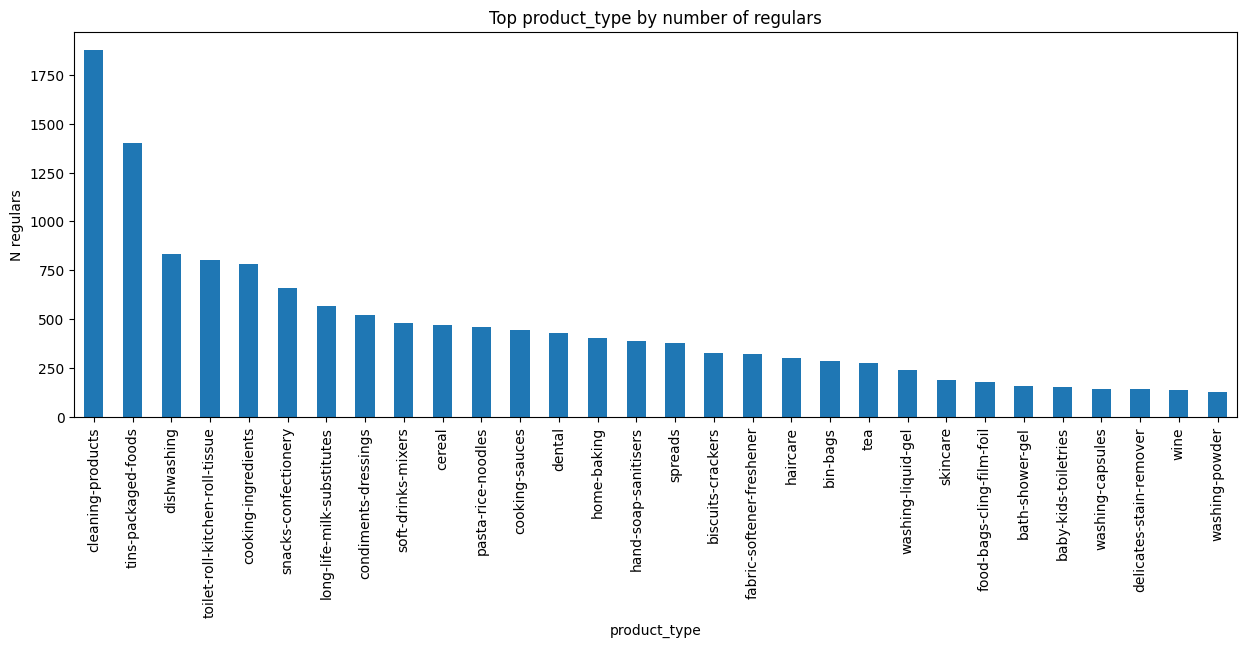

In [104]:
#Productos más comprados
clean_regulars['product_type'].value_counts().head(30).plot(kind='bar', figsize=(15, 5))
plt.title("Top product_type by number of regulars")
plt.ylabel("N regulars")

## REGULARS INSIGHTS
- Hay un producto estrella que lo compran muchos usuarios
- El producto es de la marca oatly y vale 10.79$
- Los productos más comprados son productos de limpieza
- El producto regular más caro son productos de bebé (usuarios con bebés) seguido de suplementos de comida y artículos de aseo
- superfoods-supplements: Usuarios pueden estar dispuestos a pagar un precio premium por productos de este tipo.


In [105]:
# CODIGO SOLUCIÓN GUILLE (ANÁLISIS IMPORTANTE)

diff_prevalence = (
    inventory['product_type'].value_counts(normalize=True).rename('inventory_count').reset_index()
    .merge(
        clean_regulars['product_type'].value_counts(normalize=True).rename('regulars_count').reset_index()
    )
    .assign(inventory_rank=lambda x: x.inventory_count.rank(ascending=False))
    .assign(regulars_rank=lambda x: x.regulars_count.rank(ascending=False))
    .assign(diff=lambda x:x.inventory_count -x.regulars_count)

)

diff_prevalence.sort_values('regulars_count', ascending=False).head(10)

,product_type,inventory_count,regulars_count,inventory_rank,regulars_rank,diff
0,cleaning-products,0.092325,0.124850,1.0,1.0,-0.032525
1,tins-packaged-foods,0.072129,0.093255,2.0,2.0,-0.021126
21,dishwashing,0.015580,0.055474,22.0,3.0,-0.039894
31,toilet-roll-kitchen-roll-tissue,0.010387,0.053346,32.5,4.0,-0.042959
3,cooking-ingredients,0.042123,0.052148,4.0,5.0,-0.010025
2,snacks-confectionery,0.070398,0.043900,3.0,6.0,0.026498
25,long-life-milk-substitutes,0.013849,0.037648,25.5,7.0,-0.023799
6,condiments-dressings,0.030006,0.034655,7.0,8.0,-0.004649
10,soft-drinks-mixers,0.027698,0.032061,11.0,9.0,-0.004363
7,cereal,0.029429,0.031329,8.0,10.0,-0.001900


## ORDERS

In [106]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [107]:
# Productos más comunes en las orders
common_products = orders['ordered_items'].explode().value_counts().head(10)
common_products

ordered_items
34081589887108    4487
39284117930116    2658
34137590366340    1459
34081331970180    1170
34284951863428    1133
34284950356100     954
34370361229444     939
33826465153156     884
34284949766276     838
34284950454404     683
Name: count, dtype: int64

- Podemos ver de nuevo el oatly (34081589887108)

In [108]:
least_selling_products = orders['ordered_items'].explode().value_counts().tail(10)
least_selling_products

ordered_items
33977921241220    1
33863279247492    1
33826412494980    1
34537144123524    1
39367712866436    1
33667312287876    1
39686337790084    1
39462725386372    1
33667310256260    1
33618849693828    1
Name: count, dtype: int64

In [117]:
orders.user_id.nunique()

4983

In [118]:
orders.loc[lambda x: x.user_order_seq > 1].user_id.nunique()


1411

## INSIGHTS
- El producto más común en las orders es el oatly
- De los 4983 users que realizan orders solo el 1411 realiza más de un order

## CODIGO IMPORTANTE SOLUCIÓN (NO HABRÍA PLANTEADO ESTO SIN VER LA SOLUCIÓN)

In [109]:
order_items = orders.explode('ordered_items').rename({'ordered_items': 'variant_id'}, axis=1) 
order_items

,id,user_id,created_at,order_date,user_order_seq,variant_id
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060
...,...,...,...,...,...,...
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,34537169453188
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39368665432196
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39403033428100
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39459281272964


In [110]:
order_items = order_items.merge(inventory, on='variant_id', how='left')
order_items.dropna().head()

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
70,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
71,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
76,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206054020,17.99,20.65,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v..."
77,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206283396,9.99,12.00,ecover,fabric-softener-freshener,"[cruelty-free, eco, fabric-softener-freshener,..."
81,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,39459277602948,5.79,5.98,ecloth,cleaning-products,"[eco, sponges-cloths-gloves]"


In [111]:
def compute_orders_size_and_value(x):
    return pd.Series({
        'order_size': len(x),
        'n_unique_products': x.variant_id.nunique(),
        'order_value': x.price.sum(),
        'ratio_missing_prod_data': x.price.isna().sum() / len(x)
    })

orders_size = order_items.groupby(['id', 'order_date']).apply(compute_orders_size_and_value).reset_index()

In [112]:
orders_size.head()

,id,order_date,order_size,n_unique_products,order_value,ratio_missing_prod_data
0,2204073066628,2020-04-30,14.0,12.0,0.00,1.0
1,2204707520644,2020-04-30,25.0,23.0,0.00,1.0
2,2204838822020,2020-04-30,15.0,13.0,0.00,1.0
3,2208967852164,2020-05-01,10.0,9.0,0.00,1.0
4,2215889436804,2020-05-03,10.0,8.0,8.38,0.8


In [113]:
orders_size.drop(['id', 'order_date'], axis=1).describe()

,order_size,n_unique_products,order_value,ratio_missing_prod_data
count,8773.000000,8773.000000,8773.000000,8773.000000
mean,12.305711,9.553402,55.832173,0.143926
std,6.839507,6.338529,24.316070,0.150902
min,1.000000,1.000000,0.000000,0.000000
25%,8.000000,5.000000,44.250000,0.047619
50%,11.000000,9.000000,51.860000,0.111111
75%,15.000000,13.000000,60.590000,0.200000
max,114.000000,70.000000,319.800000,1.000000


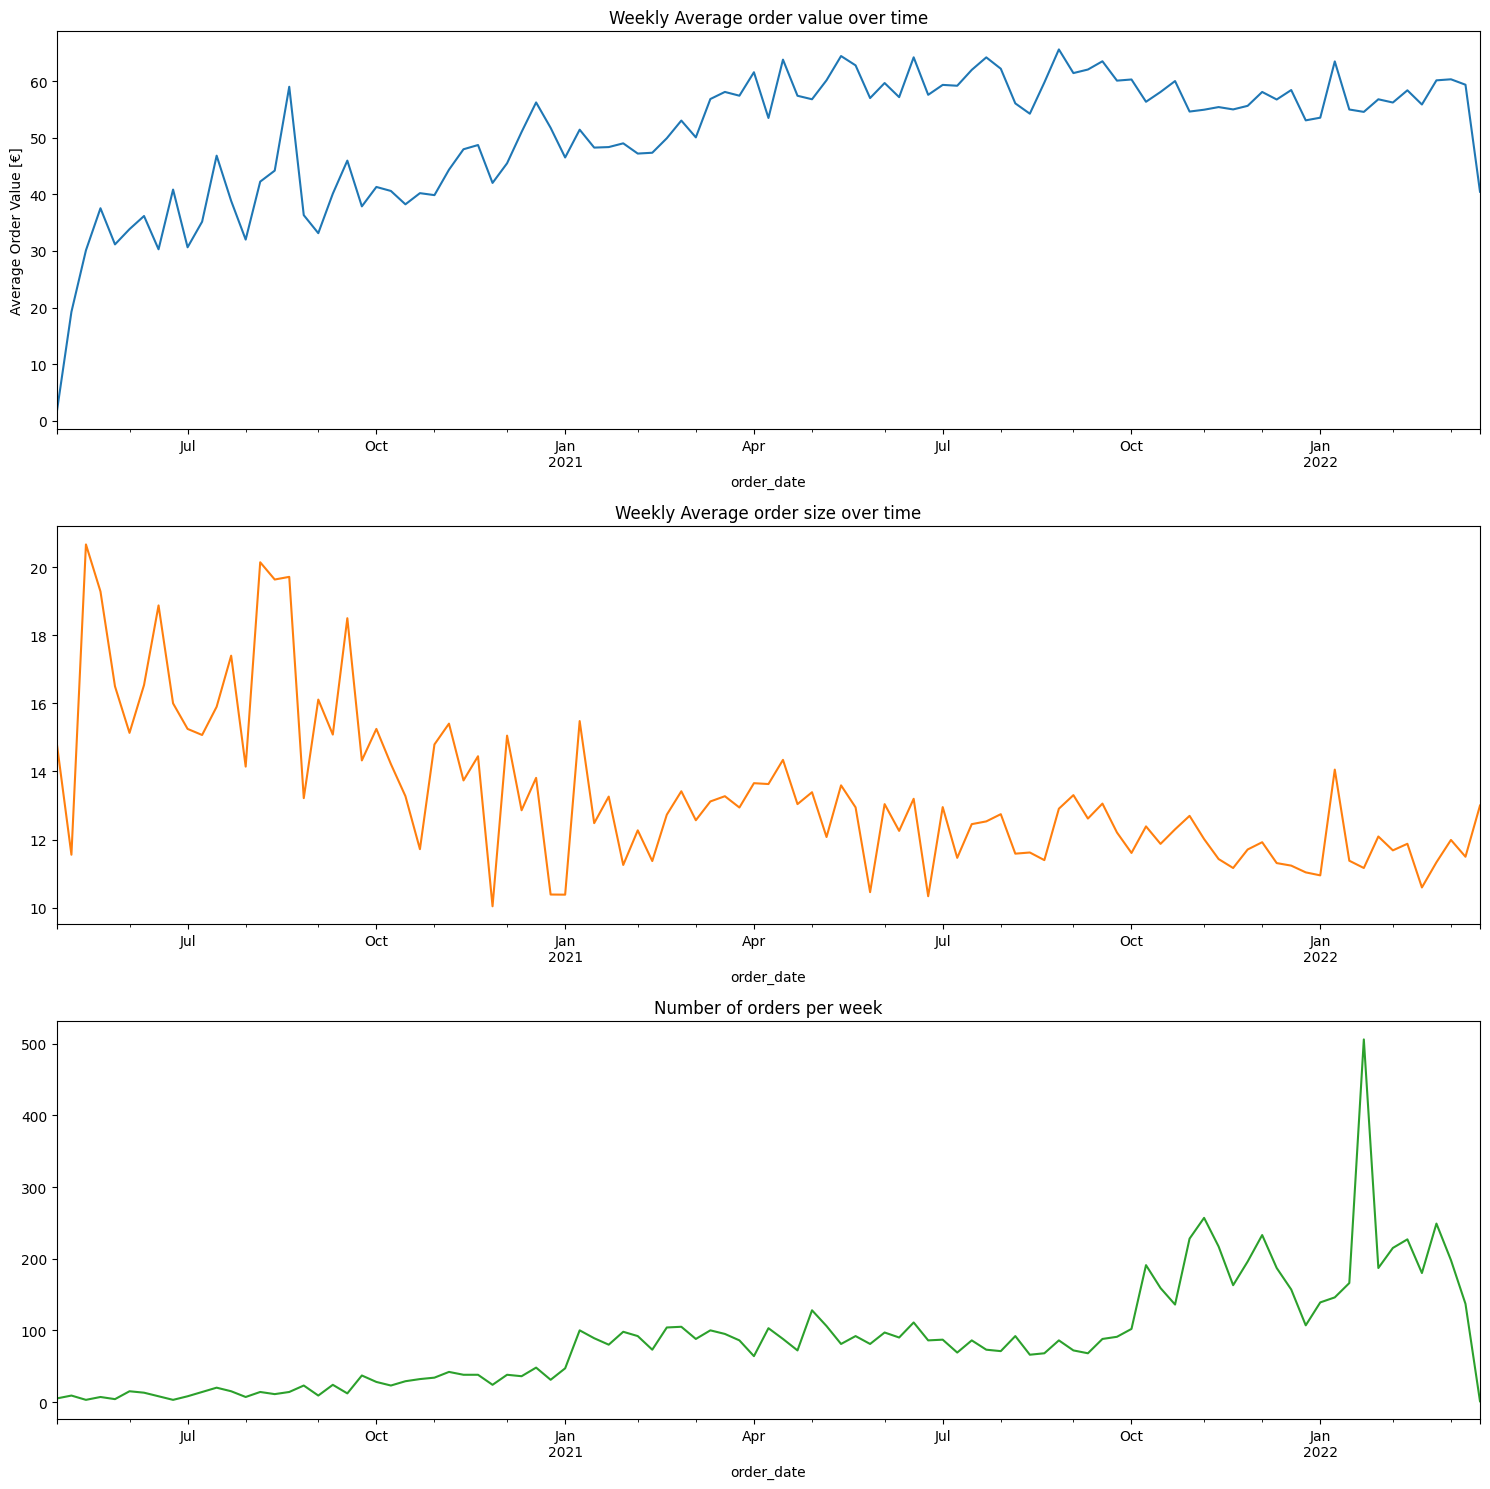

In [114]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
# plot order_value over time on a weekly basis.
orders_size.groupby(pd.Grouper(key='order_date', freq='W'))['order_value'].mean().plot(ax=ax[0])
ax[0].set_ylabel('Average Order Value [€]')
ax[0].set_title('Weekly Average order value over time')

orders_size.groupby(pd.Grouper(key='order_date', freq='W'))['order_size'].mean().plot(ax=ax[1], color='C1')
ax[1].set_title('Weekly Average order size over time')

orders_size.groupby(pd.Grouper(key='order_date', freq='W'))['id'].nunique().plot(ax=ax[2], color='C2')
ax[2].set_title('Number of orders per week')

plt.tight_layout()

Text(0, 0.5, 'Retention Rate')

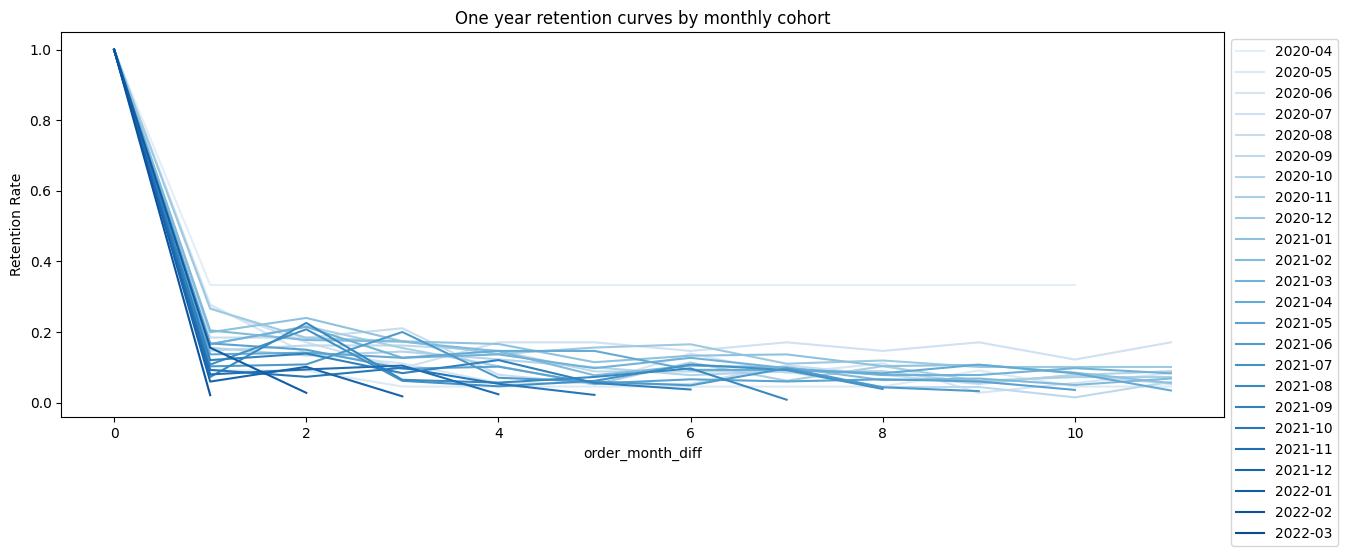

In [115]:
## Retention curve by cohort
def compute_cohort_stats(x):
    cohort_size = x.loc[lambda x: x.order_month_diff == 0, 'user_id'].nunique()
    return (x.groupby('order_month_diff')['user_id'].nunique() / cohort_size).rename('retention_rate')

fig, ax = plt.subplots(figsize=(15,5))

retention_curves = (
    orders.assign(first_order_month=lambda x: x.groupby('user_id')['order_date'].transform('min').dt.to_period('M'))
    .assign(order_month=lambda x: x.order_date.dt.to_period('M'))
    .assign(order_month_diff=lambda x: (x.order_month - x.first_order_month).apply(lambda x: x.n))
    .groupby('first_order_month').apply(compute_cohort_stats)
    .reset_index()
)

colors = plt.cm.Blues(np.linspace(0.1, 0.9, retention_curves.first_order_month.nunique()))
count=0
for label, df in retention_curves.groupby('first_order_month'):
    df.loc[lambda x: x.order_month_diff < 12].plot(x='order_month_diff', y='retention_rate', ax=ax, label=label, color=colors[count])
    count += 1

# legend outside of box
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('One year retention curves by monthly cohort')
plt.ylabel('Retention Rate')

## INSIGHTS SOLUCIÓN GUILLE

Vemos que el retention_rate por cohortes se estabiliza en torno a 10-15%. Segun avanzamos en el tiempo parece que los nuevos cohortes son peores!!
- Limitación importante para analizar a nivel de cesta ya que solo tenemos información de los producto que vendemos hoy (inventory) pero no de todos los productos que hemos vendido en el pasado! 
- En cuanto a basket composition, tenemos unas pocas categorías que aparecen en +30% de las compras -> Lo que la gente viene a comprar (anchor). A nivel de producto, tenemos Oatly que es comprado en casi el 20% de las cestas. Por qué?! Somos mucho más baratos? Riesgo de "race to the bottom" en precios? Riesgo de supply? 
- En estático vemos que el average order value es 56€. En serie temporal, vemos como el valor de las cestas creció hasta abril 2021 y a partir de ahí se ha quedado flat!

## 2.EDA

In [135]:
box_order_product = pd.read_csv("/home/pamalo/zrive-ds/data/module_2/feature_frame.csv")

In [136]:
box_order_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [137]:
box_order_product.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


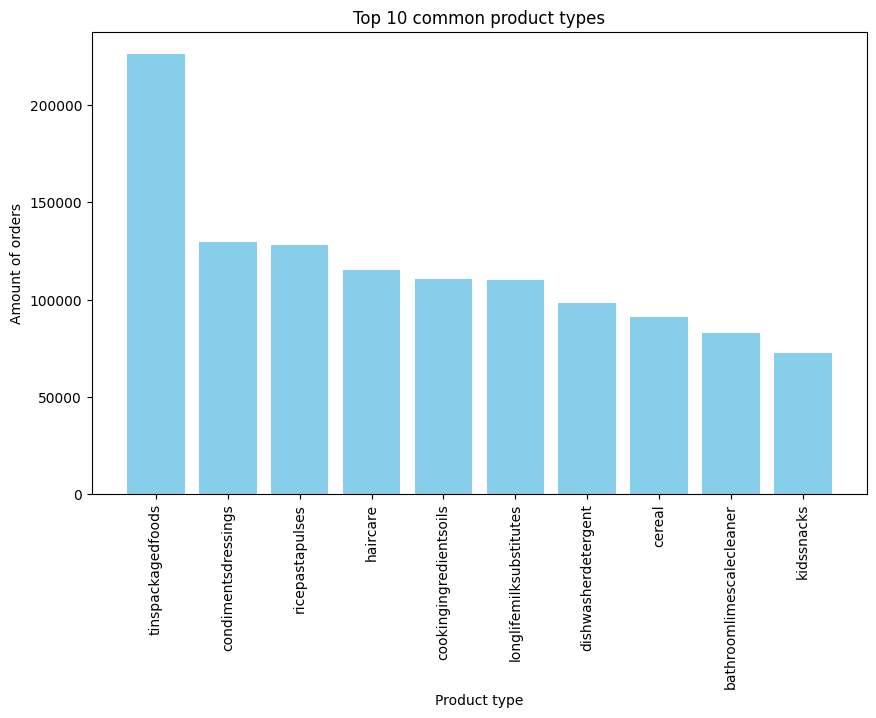

In [163]:
product_type_dist = box_order_product['product_type'].value_counts()

# Mostrar los 10 tipos de productos más comunes
top_10_product_types = product_type_dist.head(10)

# Crear un gráfico de barras para visualizar la distribución
plt.figure(figsize=(10, 6))
plt.bar(top_10_product_types.index, top_10_product_types.values, color='skyblue')
plt.title('Top 10 common product types')
plt.xlabel('Product type')
plt.ylabel('Amount of orders')
plt.xticks(rotation=90)
plt.show()

In [144]:
box_order_product['outcome'].value_counts()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

In [166]:
# Calculo la media del porcentaje de compras por pedido
purchase_ptg = (box_order_product['outcome'] == 1).mean()
print(f"Percentage of purcheses respect the orders: {purchase_ptg:.2%}")

# Calculo el porcentaje de los articulos anteriormente
order_before_ptg = (box_order_product['ordered_before'] == 1).mean()
print(f"Percentage of ordered before: {order_before_ptg:.2%}")

# Calculo el porcentaje de los articulos abandonados anteriormente
abandoned_before_ptg = (box_order_product['abandoned_before'] == 1).mean()
print(f"Percentage of abandoneed before: {abandoned_before_ptg:.2%}")

Percentage of purcheses respect the orders: 1.15%
Percentage of ordered before: 2.11%
Percentage of abandoneed before: 0.06%


In [168]:
# Calcular la correlación entre las variables
correlacion = box_order_product[['outcome', 'ordered_before', 'abandoned_before']].corr()
print("Correlation:")
print(correlacion)

Correlation:
                   outcome  ordered_before  abandoned_before
outcome           1.000000        0.211139          0.163332
ordered_before    0.211139        1.000000          0.056228
abandoned_before  0.163332        0.056228          1.000000
